![](./img/sktime-logo-text-horizontal.jpg)

# Introduction to `sktime`

### Vision statement

- an easy-to-use, easy-to-extend, comprehensive **python framework** for ML and AI with time series
- **open source, permissive license, free to use**
- **openly and transparently governed**
- **friendly, responsive, kind and inclusive** community, with an active commitment to ensure fairness and equal opportunity
- an academically and commercially **neutral space**, with an **ecosystem integration** ambition and neutral point of view
- an **educational platform**, providing mentoring and upskilling opportunities for all career stages, especially early career


`sktime` is a vibrant, welcoming community with mentoring opportunities!

- We _love_ new contributors. Even if you are new to open source software development!
- Check out the `sktime` [new contributors guide](https://www.sktime.net/en/latest/get_involved/contributing.html)
- join our [discord](https://discord.com/invite/54ACzaFsn7) and/or one of our regular meetups!
- follow us on [LinkedIn](https://www.linkedin.com/company/scikit-time/)!


Further reading:

- `sktime` [notebook tutorials on binder](https://mybinder.org/v2/gh/sktime/sktime/main?filepath=examples)
- recorded [video tutorials](https://www.youtube.com/playlist?list=PLKs3UgGjlWHqNzu0LEOeLKvnjvvest2d0)
- find a bug or type? [tutorial feedback thread](https://github.com/sktime/sktime/issues/1447)

## Contents

`sktime` provides a unified, `scikit-learn`-like toolbox interface to multiple time series learning tasks.

**Section 1** explains what a `scikit-learn`-like toolbox is, using the example of `scikit-learn`.

**Section 2** gives an overview of learning with time series and challenges in the space.

**Section 3** gives a high-level engineering overview of `sktime`.

### 1. `sklearn` unified interface - the strategy pattern

`sktime` follows the `sklearn` / `skbase` interface:

- unified interface for objects/estimators
- modular design, strategy patterns
- composable, composites are interface homogeneous
- simple specification language and parameter interface
- visually informative pretty printing

`sklearn` provides a unified interface to multiple learning tasks including classification, regression.

any (supervised) estimator has the following interface points

1. **Instantiate** your model of choice, with parameter settings
2. **Fit** the instance of your model
3. Use that fitted instance to **predict** new data!

<img src="./img/estimator-conceptual-model.jpg" alt="Estimator conceptual model" style="width: 100%; max-width: 600px;">

the above in code:

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
# get data to use the model on
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True, as_frame=True)
random_seed = 60
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_seed)

In [3]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
59,5.2,2.7,3.9,1.4
52,6.9,3.1,4.9,1.5
108,6.7,2.5,5.8,1.8
36,5.5,3.5,1.3,0.2
134,6.1,2.6,5.6,1.4


In [4]:
y_train.head()

59     1
52     1
108    2
36     0
134    2
Name: target, dtype: int64

In [6]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
69,5.6,2.5,3.9,1.1
71,6.1,2.8,4.0,1.3
97,6.2,2.9,4.3,1.3
42,4.4,3.2,1.3,0.2
73,6.1,2.8,4.7,1.2
35,5.0,3.2,1.2,0.2
67,5.8,2.7,4.1,1.0
33,5.5,4.2,1.4,0.2
23,5.1,3.3,1.7,0.5
133,6.3,2.8,5.1,1.5


In [5]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
69,5.6,2.5,3.9,1.1
71,6.1,2.8,4.0,1.3
97,6.2,2.9,4.3,1.3
42,4.4,3.2,1.3,0.2
73,6.1,2.8,4.7,1.2


In [9]:
from sklearn.svm import SVC

# 1. Instantiate SVC with parameters gamma, C
clf = SVC(gamma=0.001, C=100.0) # classifier

# 2. Fit clf to training data
clf.fit(X_train, y_train)

# 3. Predict labels on test data
y_test_pred = clf.predict(X_test)

y_test_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0,
       1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0])

IMPORTANT: to use another classifier, only the specification line, part 1 changes!

`SVC` could have been `RandomForest`, steps 2 and 3 remain the same - unified interface:

In [10]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instantiate SVC with parameters gamma, C
clf = RandomForestClassifier(n_estimators=100)

# 2. Fit clf to training data
clf.fit(X_train, y_train)

# 3. Predict labels on test data
y_test_pred = clf.predict(X_test)

y_test_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0,
       1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0])

In object oriented design terminology, this is called **"strategy pattern"**

= different estimators can be switched out without change to the interface

= like a power plug adapter, it's plug&play if it conforms with the interface

Pictorial summary:

<img src="./img/sklearn-unified-interface.jpg" alt="Unified estimator interface" style="width: 100%; max-width: 600px;">

parameters can be accessed and set via `get_params`, `set_params`:

In [11]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 2. `sktime` is devoted to time-series data analysis

Richer space of time series tasks, compared to "tabular":

- **Forecasting** - predict energy consumption tomorrow, based on past weeks
- **Classification** - classify electrocardiograms to healthy/sick, based on prior examples
- **Regression** - predict compound purity in bioreactor based on temperature/pressure profile
- **Clustering** - sort outlines of tree leaves into a small number of similar classes
- **Annotation** - identify jumps, anomalies, events in a data stream

`sktime` aims to provide `sklearn`-like, modular, composable, interfaces for these!

| Task | Status | Links |
|---|---|---|
| **Forecasting** | stable | [Tutorial](https://www.sktime.net/en/latest/examples/01_forecasting.html) · [API Reference](https://www.sktime.net/en/latest/api_reference/forecasting.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/forecasting.py)  |
| **Time Series Classification** | stable | [Tutorial](https://github.com/sktime/sktime/blob/main/examples/02_classification.ipynb) · [API Reference](https://www.sktime.net/en/latest/api_reference/classification.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/classification.py) |
| **Time Series Regression** | stable | [Tutorial](https://github.com/sktime/sktime/blob/main/examples/02_classification.ipynb) · [API Reference](https://www.sktime.net/en/latest/api_reference/regression.html) |
| **Transformations** | stable | [Tutorial](https://github.com/sktime/sktime/blob/main/examples/03_transformers.ipynb) · [API Reference](https://www.sktime.net/en/latest/api_reference/transformations.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/transformer.py)  |
| **Performance metrics for forecasts** | stable | [API Reference](https://www.sktime.net/en/latest/api_reference/performance_metrics.html) |
| **Time series splitting/resampling** | stable | [API Reference](https://www.sktime.net/en/latest/api_reference/split.html) |
| **Parameter fitting** | maturing | [API Reference](https://www.sktime.net/en/latest/api_reference/param_est.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/transformer.py)  |
| **Time Series Alignment** | maturing | [API Reference](https://www.sktime.net/en/latest/api_reference/alignment.html) ·  [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/alignment.py) |
| **Time Series Clustering** | maturing | [API Reference](https://www.sktime.net/en/latest/api_reference/clustering.html) ·  [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/clustering.py) |
| **Time Series Distances/Kernels** | maturing | [Tutorial](https://github.com/sktime/sktime/blob/main/examples/03_transformers.ipynb) · [API Reference](https://www.sktime.net/en/latest/api_reference/dists_kernels.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/dist_kern_panel.py) |
| **Anomalies, changepoints** | experimental | [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/annotation.py) |

In the [skpro](https://github.com/sktime/skpro) companion package:

| Module | Status | Links |
|---|---|---|
| **Probabilistic tabular regression** | maturing | [Tutorial](https://github.com/sktime/skpro/blob/main/examples/01_skpro_intro.ipynb) · [API Reference](https://skpro.readthedocs.io/en/latest/api_reference/regression.html) · [Extension Template](https://github.com/sktime/skpro/blob/main/extension_templates/regression.py) |
| **Time-to-event (survival) prediction** | maturing |  [Tutorial](https://github.com/sktime/skpro/blob/main/examples/02_skpro_survival.ipynb) · [API Reference](https://skpro.readthedocs.io/en/latest/api_reference/survival.html) · [Extension Template](https://github.com/sktime/skpro/blob/main/extension_templates/survival.py) |
| **Performance metrics for proba predictions** | maturing | [API Reference](https://skpro.readthedocs.io/en/latest/api_reference/metrics.html) |
| **Probability distributions** | maturing | [Tutorial](https://github.com/sktime/skpro/blob/main/examples/03_skpro_distributions.ipynb) · [API Reference](https://skpro.readthedocs.io/en/latest/api_reference/distributions.html) · [Extension Template](https://github.com/sktime/skpro/blob/main/extension_templates/distributions.py) |


### Example - forecasting

<img src="./img/forecasting.png" alt="Forecasting" style="width: 100%; max-width: 600px;">

In [12]:
# get the data
from sktime.datasets import load_airline

y = load_airline()

In [13]:
import numpy as np

from sktime.forecasting.naive import NaiveForecaster

# step 1: specify the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 2: specify forecasting horizon
fh = np.arange(1, 37)  # we want to predict the next 36 months

# step 3: fit the forecaster
forecaster.fit(y, fh=fh)

# step 4: make the forecast
y_pred = forecaster.predict()

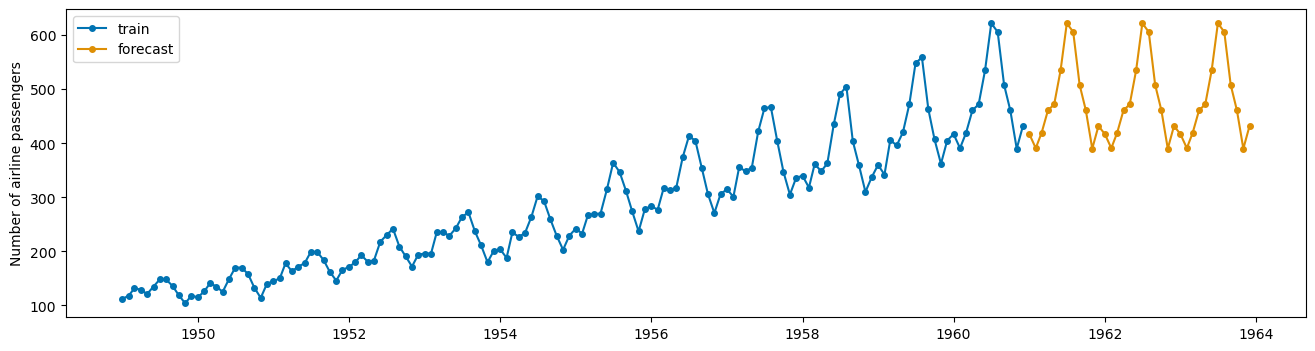

In [14]:
from sktime.utils.plotting import plot_series

fig, ax = plot_series(y, y_pred, labels=["train", "forecast"])

### Example - time series classification

![](./img/tsc.png)

In [15]:
# get the data
from sktime.datasets import load_osuleaf

# for training
X_train, y_train = load_osuleaf(split="train", return_type="numpy3D")

# for prediction
X_new, _ = load_osuleaf(split="test", return_type="numpy3D")
X_new = X_new[:2]

In [17]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.dists_kernels import ScipyDist
from sktime.dists_kernels.compose_tab_to_panel import AggrDist

# step 1 - specify the classifier
mean_eucl_dist = AggrDist(ScipyDist())
clf = KNeighborsTimeSeriesClassifier(n_neighbors=3, distance=mean_eucl_dist)

# step 2 - fit the classifier
clf.fit(X_train, y_train)

# step 3 - predict labels on new data
y_pred = clf.predict(X_new)

In [18]:
X_train.shape

(200, 1, 427)

In [19]:
y_train.shape

(200,)

In [20]:
X_new.shape

(2, 1, 427)

In [21]:
y_pred.shape

(2,)

### 3. `sktime` integrates the time series modelling ecosystem!

the package space for time series is highly fragmented:

- lots of great implementations and methods out there!
- but many different interfaces, not composable like `sklearn`

<img src="./img/ts-fragmentation.png" alt="The fragmented time series ecosystem" style="width: 100%; max-width: 600px;">


`sktime` integrates the ecosystem - in friendly collaboration with all the packages out there!

<img src="./img/sktime-interoperable.png" alt="sktime integration" style="width: 100%; max-width: 600px;">

<img src="./img/sktime-composable.png" alt="sktime composition" style="width: 100%; max-width: 600px;">

easy search for plug&play components across the ecosystem!

Try the [`sktime` estimator search](https://www.sktime.net/en/latest/estimator_overview.html)

<img src="./img/estimator-search.png" alt="sktime estimator search" style="width: 100%; max-width: 600px;">

### 4. Summary

- `sklearn` interface: unified interface (strategy pattern), modular, composition stable, easy specification language
- `sktime` evolves the interface for time series learning tasks
- `sktime` integrates a fragmented ecosytem with interface, composability, dependency management

<hr>

### Credits: notebook 0 - `sktime` and `sklearn` intro

notebook creation: fkiraly, marrov

some vignettes based on existing `sktime` tutorials, credit: fkiraly, miraep8

slides (png/jpg):
* from fkiraly's postgraduate course at UCL, Principles and Patterns in Data Scientific Software Engineering
* ecosystem slide: fkiraly, mloning
* learning tasks: fkiraly, mloning

<hr>

#### many thanks to [all `sktime` contributors](https://www.sktime.net/en/latest/about/contributors.html)!

Citations & credits in academic research papers:

`sktime` toolbox: [sktime: A unified interface for machine learning with time series](https://arxiv.org/abs/1909.07872)

`sktime` design principles: [Designing machine learning toolboxes: Concepts, principles and patterns](https://arxiv.org/abs/2101.04938)